In [140]:
import pandas as pd

In [141]:
from sklearn.datasets import load_diabetes
X,y = load_diabetes(return_X_y=True, as_frame=True,scaled = True)

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score, mean_squared_error

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.iloc[0] , y_train.iloc[0]

(age    0.070769
 sex    0.050680
 bmi    0.012117
 bp     0.056301
 s1     0.034206
 s2     0.049416
 s3    -0.039719
 s4     0.034309
 s5     0.027364
 s6    -0.001078
 Name: 17, dtype: float64,
 np.float64(144.0))

In [144]:
#Import linear regression model and see it's performance
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred),mean_squared_error(y_test, y_pred)

(0.4526027629719195, 2900.1936284934814)

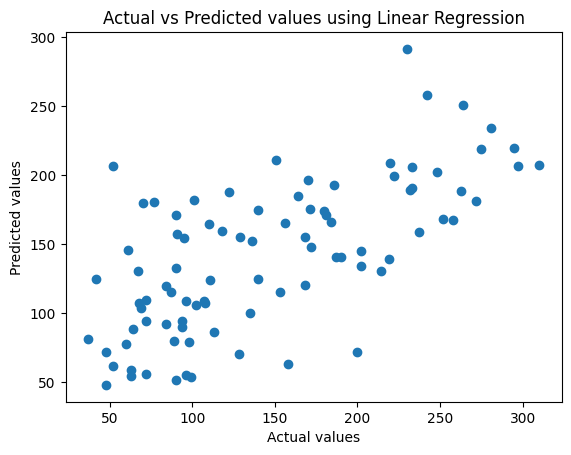

In [145]:
#Let's plot the acutal vs predicted values
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted values using Linear Regression")
plt.show()

In [146]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred),mean_squared_error(y_test, y_pred)

(0.0528242419101258, 5018.2808988764045)

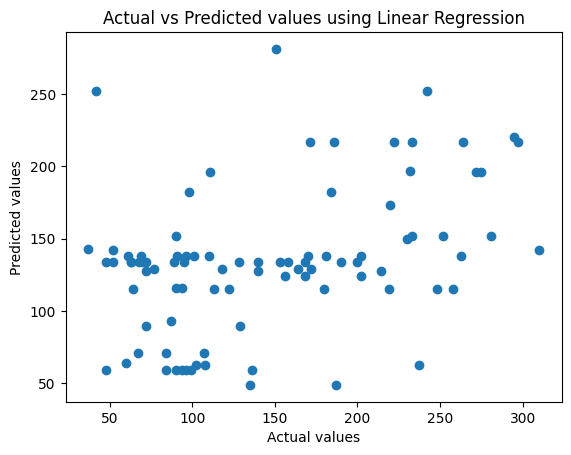

In [147]:
#Let's plot the acutal vs predicted values
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted values using Linear Regression")
plt.show()

In [148]:
X_train.iloc[0] , y_train.iloc[0]

(age    0.070769
 sex    0.050680
 bmi    0.012117
 bp     0.056301
 s1     0.034206
 s2     0.049416
 s3    -0.039719
 s4     0.034309
 s5     0.027364
 s6    -0.001078
 Name: 17, dtype: float64,
 np.float64(144.0))

In [149]:
model.predict([X_train.iloc[0]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([196.])

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [151]:
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [152]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


0.9
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.75      1.00      0.86         9
           2       1.00      0.73      0.84        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.90        30
weighted avg       0.93      0.90      0.90        30

[[10  0  0]
 [ 0  9  0]
 [ 0  3  8]]


In [153]:
#Using titanic dataset from seaborn inbuilt datasets
import seaborn as sns
data = sns.load_dataset('titanic')
data = data.dropna() 
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [154]:
#Creating training and testing data with only categorical columns
X = data.drop(['survived','alive','age','deck','fare'], axis=1) # Dropping 'deck' column due to high missing values
y = data['alive']

In [155]:
#Label encoding categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in X.select_dtypes(include=['object','category', 'bool','int']).columns:
    X[col] = le.fit_transform(X[col])

In [156]:
X.head(), X.shape

(    pclass  sex  sibsp  parch  embarked  class  who  adult_male  embark_town  \
 1        0    0      1      0         0      0    2           0            0   
 3        0    0      1      0         2      0    2           0            2   
 6        0    1      0      0         2      0    1           1            2   
 10       2    0      1      1         2      2    0           0            2   
 11       0    0      0      0         2      0    2           0            2   
 
     alone  
 1       0  
 3       0  
 6       1  
 10      0  
 11      1  ,
 (182, 10))

In [157]:
#Label encoding for y as it is series of categorical values
y = le.fit_transform(y)
y.shape

(182,)

In [158]:
X.head()

,pclass,sex,sibsp,parch,embarked,class,who,adult_male,embark_town,alone
1,0,0,1,0,0,0,2,0,0,0
3,0,0,1,0,2,0,2,0,2,0
6,0,1,0,0,2,0,1,1,2,1
10,2,0,1,1,2,2,0,0,2,0
11,0,0,0,0,2,0,2,0,2,1


In [159]:
#Train test spllit
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
#applying MultinomialNB model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7027027027027027
              precision    recall  f1-score   support

           0       0.55      0.85      0.67        13
           1       0.88      0.62      0.73        24

    accuracy                           0.70        37
   macro avg       0.72      0.74      0.70        37
weighted avg       0.77      0.70      0.71        37

[[11  2]
 [ 9 15]]


In [161]:
#Using categorical Naive Bayes from sklearn
from sklearn.naive_bayes import CategoricalNB
cnb = CategoricalNB()
cnb.fit(X_train, y_train)
y_pred = cnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7027027027027027
              precision    recall  f1-score   support

           0       0.55      0.85      0.67        13
           1       0.88      0.62      0.73        24

    accuracy                           0.70        37
   macro avg       0.72      0.74      0.70        37
weighted avg       0.77      0.70      0.71        37

[[11  2]
 [ 9 15]]


In [162]:
#Using Complement Naive Bayes
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB()
cnb.fit(X_train, y_train)
y_pred = cnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.6216216216216216
              precision    recall  f1-score   support

           0       0.48      0.85      0.61        13
           1       0.86      0.50      0.63        24

    accuracy                           0.62        37
   macro avg       0.67      0.67      0.62        37
weighted avg       0.72      0.62      0.62        37

[[11  2]
 [12 12]]
